In [13]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [59]:
e4 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python')
e5 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python')
e6 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python')

In [60]:
e4['년'] = e4['구분'].apply(lambda v: v.split('년')[0])
e4['월'] = e4['구분'].apply(lambda v: v.split('년')[1])

e5['년'] = e5['구분'].apply(lambda v: v.split('년')[0])
e5['월'] = e5['구분'].apply(lambda v: v.split('년')[1])

e6['년'] = e6['구분'].apply(lambda v: v.split('년')[0])
e6['월'] = e6['구분'].apply(lambda v: v.split('년')[1])
# e4.drop(columns=['구분'], inplace=True)
# df['name'] = df['name'].apply(lambda e: e.split()[0])
# femp.drop(columns=['empno'], inplace=True)
e4

구분  사고(건)  사망(명)  부상(명)     년    월
0    2014년1월    169      7    347  2014   1월
1    2014년2월    145      3    268  2014   2월
2    2014년3월    206     12    358  2014   3월
3    2014년4월    182      4    360  2014   4월
4    2014년5월    218     17    474  2014   5월
5    2014년6월    233     13    457  2014   6월
6    2014년7월    229     14    431  2014   7월
7    2014년8월    222      9    447  2014   8월
8    2014년9월    225     15    430  2014   9월
9   2014년10월    210     14    392  2014  10월
10  2014년11월    209     10    386  2014  11월
11  2014년12월    178     12    329  2014  12월

In [61]:
e4.drop(columns=['구분'], inplace=True)
e5.drop(columns=['구분'], inplace=True)
e6.drop(columns=['구분'], inplace=True)



In [74]:
# pd.concat([emp,dept])
total = pd.concat([e4,e5,e6])
total['월'] = total['월'].apply(lambda v: int(v.split('월')[0]))
# total['월'] = int(total['월'])

In [80]:
total = total.pivot_table(index=['년','월'])
total

부상(명)  사고(건)  사망(명)
년    월                      
2014 1     347    169      7
     2     268    145      3
     3     358    206     12
     4     360    182      4
     5     474    218     17
     6     457    233     13
     7     431    229     14
     8     447    222      9
     9     430    225     15
     10    392    210     14
     11    386    209     10
     12    329    178     12
2015 1     375    205      8
     2     375    175      8
     3     492    237      4
     4     486    227     10
     5     504    231      9
     6     401    207      8
     7     556    273      7
     8     534    268     19
     9     501    252     10
     10    475    214     14
     11    398    199      3
     12    428    213      8
2016 1     387    192      5
     2     328    174      6
     3     435    217      7
     4     419    216      7
     5     522    239     13
     6     362    200     12
     7     460    227      9
     8     490    230      7
     9     347    187     13
     10    367    183     10
     11    418    200      5
     12    364    168      4

In [97]:
(total.loc["2016", :]['사망(명)'])/(total.loc["2016", :]['사고(건)']) * 100


월
1     2.604167
2     3.448276
3     3.225806
4     3.240741
5     5.439331
6     6.000000
7     3.964758
8     3.043478
9     6.951872
10    5.464481
11    2.500000
12    2.380952
dtype: float64

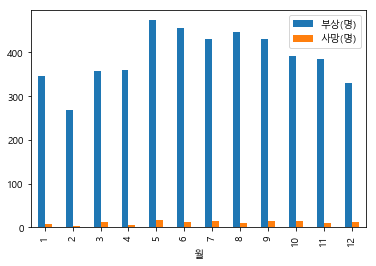

In [102]:
t2014 = total.loc["2014", :]
t2014.drop(columns=['사고(건)'],inplace=True)
t2014.plot(kind='bar')
plt.show()

In [126]:
((total.loc["2016", :]['사망(명)']) - (total.loc["2015", :]['사망(명)'])).sort_values(ascending = False)
# dmax = ((total.loc["2016", :]['사망(명)']) - (total.loc["2015", :]['사망(명)'])).max()
# dmax
# total.loc["2016", :]['사망']



월
6      4
5      4
9      3
3      3
11     2
7      2
2     -2
4     -3
1     -3
12    -4
10    -4
8    -12
Name: 사망(명), dtype: int64

In [131]:
dmax = ((total.loc["2016", :]['사망(명)']) - (total.loc["2015", :]['사망(명)']))
total.loc["2016", :][dmax == dmax.max()]

부상(명)  사고(건)  사망(명)
월                     
5    522    239     13
6    362    200     12